In [3]:
!uv add matplotlib scikit-learn

Resolved 257 packages in 222ms
Audited 235 packages in 1ms


In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA  # Or t-SNE/UMAP from sklearn.manifold or umap-learn (install if needed)
from sentence_transformers import SentenceTransformer # for obtaining vector embeddings from text data using pre-trained models.

In [93]:
# Example documents
documents = [
    'Bugs introduced by the intern had to be squashed by the lead developer.',
    'Bugs found by the intern engineer were difficult to debug.',
    'Bugs are main study of entomologist central to india regardless of this malaria happens to children and women.',
    'Bugs are entomologist in india malaria in children.',
    # 'Bugs, in particular spiders, are extensively studied by arachnologists.'
    #     'Bugs are common throughout the warm summer months, according to the entomologist.',
    # 'Bugs are common in the warm summer months, as per the entomologist.',
]

# Load a pre-trained model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Generate embeddings
embeddings = model.encode(documents)

embeddings.shape #Let's explore the shape of our embeddings:

(4, 384)

In [94]:
# Labels for your sentences
# labels = [
#     "Software Bug 1",
#     "Software Bug 2",
#     "Insect Bug 1",
#     "Insect Bug 2"
# ]
labels = [
    'Bugs intern developer.',
    'Bugs quality engineer.',
    'Bugs entomologist.',
    'Bugs arachnologists.'
]


### Below is 2d Show

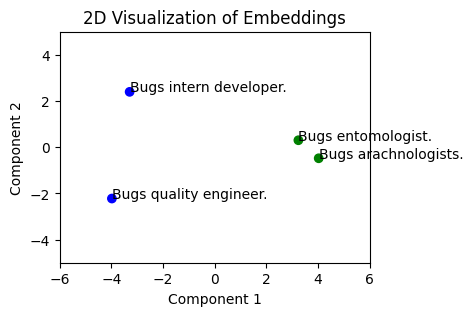

In [95]:
# Apply PCA (replace with TSNE() or UMAP() for alternatives)
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

# Plot
plt.figure(figsize=(4, 3))
plt.scatter(reduced[:, 0], reduced[:, 1], c=['blue', 'blue', 'green', 'green'])  # Color by group
for i, label in enumerate(labels):
    plt.annotate(label, (reduced[i, 0], reduced[i, 1]))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2D Visualization of Embeddings')

# Hardcode axis limits to -20 to 20  # remove this part for automatic size
plt.xlim([-6, 6])
plt.ylim([-5, 5])

plt.show()

### Below is 3d show

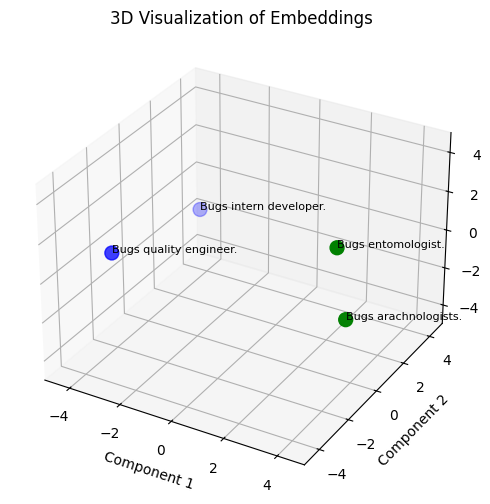

In [96]:
# Apply PCA for 3D reduction (replace with TSNE() or UMAP() if preferred)
pca = PCA(n_components=3)
reduced = pca.fit_transform(embeddings)

# Create 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced[:, 0], reduced[:, 1], reduced[:, 2],
    c=['blue', 'blue', 'green', 'green'],  # Color by group
    s=100  # Point size for visibility
)

# Annotate points with labels
for i, label in enumerate(labels):
    ax.text(reduced[i, 0], reduced[i, 1], reduced[i, 2], label, fontsize=8)

# Hardcode axis limits to -20 to 20 # comment out for automatic  size
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])

# Labels and title
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('3D Visualization of Embeddings')

plt.show()

### 3d with vectors

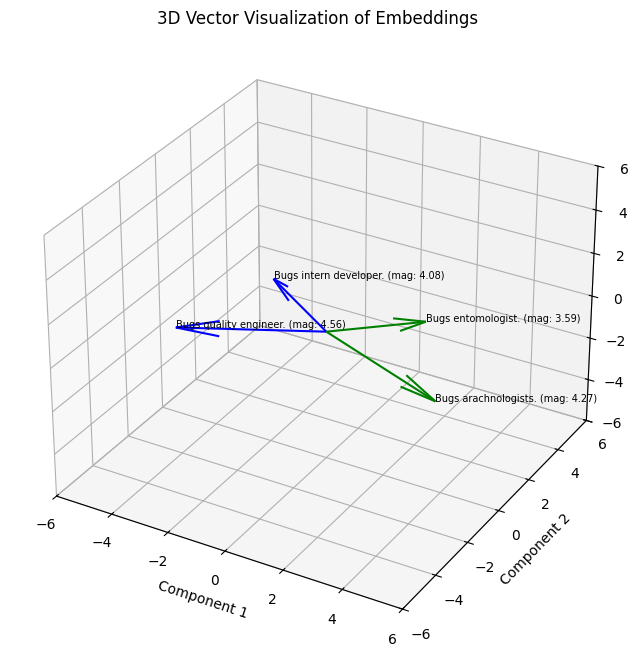

In [97]:
import matplotlib.pyplot as plt
import numpy as np  # For magnitude calculation
from mpl_toolkits.mplot3d import Axes3D

# Create 3D plot with vectors
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Draw arrows: origins at (0,0,0), directions to (x,y,z)
ax.quiver(
    [0]*len(reduced), [0]*len(reduced), [0]*len(reduced),  # X/Y/Z origins
    reduced[:, 0], reduced[:, 1], reduced[:, 2],            # X/Y/Z directions
    color=['blue', 'blue', 'green', 'green'],               # Colors by group
    length=1.0, normalize=False  # Preserve actual lengths
)

# Annotate with labels and magnitudes
for i, label in enumerate(labels):
    x, y, z = reduced[i, 0], reduced[i, 1], reduced[i, 2]
    mag = np.linalg.norm([x, y, z])  # Euclidean magnitude
    ax.text(x, y, z, f"{label} (mag: {mag:.2f})", fontsize=7)

# Hardcode axis limits to -20 to 20
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.set_zlim([-6, 6])

# Labels and title
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('3D Vector Visualization of Embeddings')

plt.show()